In [73]:
from pauls_functions_advanced import *
import pandas as pd

In [8]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
data_df = pd.DataFrame(data.data, columns=data.feature_names)
data_df['diagnosis'] = data.target
features = data_df.iloc[:, 0:30]
diagnosis = data_df.iloc[:, 30]
orig_cols = data_df.iloc[:, 0:30].columns
# random = 20 #random number to fix seed
from sklearn.model_selection import train_test_split

In [14]:
iters = 10

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size = 0.2 , random_state=4, stratify=diagnosis)

In [60]:
from interpretableai import iai
ORT = iai.GridSearch(iai.OptimalTreeClassifier(),max_depth=range(1,4))

ORT.fit(X_train, y_train)
model = iai.OptimalTreeClassifier(**ORT.get_best_params())
model.fit(X_train, y_train)
model.score(X_test , y_test)

0.9473684210526316

In [70]:
if not not dt_rules_reg_cart:
    print('zes')

In [81]:
rules[0]

[]

In [78]:
pd.DataFrame(rules)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,(feature['worst perimeter'] < 111.5) & (featur...,(feature['worst perimeter'] < 111.5) & (featur...,(feature['worst perimeter'] < 111.5) & (featur...,(feature['worst perimeter'] < 111.5) & (featur...,(feature['worst perimeter'] >= 111.5) & (featu...,(feature['worst perimeter'] >= 111.5) & (featu...,(feature['worst perimeter'] >= 111.5) & (featu...,(feature['worst perimeter'] >= 111.5) & (featu...,(feature['worst perimeter'] < 111.5) & (featur...,(feature['worst perimeter'] < 111.5) & (featur...,(feature['worst perimeter'] < 111.5) & (featur...,(feature['worst perimeter'] < 111.5) & (featur...,(feature['worst perimeter'] >= 111.5) & (featu...,(feature['worst perimeter'] >= 111.5) & (featu...,(feature['worst perimeter'] >= 111.5) & (featu...,(feature['worst perimeter'] >= 111.5) & (featu...
2,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,(feature['worst radius'] < 16.795) & (feature[...,(feature['worst radius'] < 16.795) & (feature[...,(feature['worst radius'] < 16.795) & (feature[...,(feature['worst radius'] < 16.795) & (feature[...,(feature['worst radius'] >= 16.795) & (feature...,(feature['worst radius'] >= 16.795) & (feature...,(feature['worst radius'] >= 16.795) & (feature...,(feature['worst radius'] >= 16.795) & (feature...,(feature['worst radius'] < 16.795) & (feature[...,(feature['worst radius'] < 16.795) & (feature[...,(feature['worst radius'] < 16.795) & (feature[...,(feature['worst radius'] < 16.795) & (feature[...,(feature['worst radius'] >= 16.795) & (feature...,(feature['worst radius'] >= 16.795) & (feature...,(feature['worst radius'] >= 16.795) & (feature...,(feature['worst radius'] >= 16.795) & (feature...
4,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [74]:
iters = 10

In [110]:
performance_by_iter = pd.DataFrame(columns = ["Logistic Regression", "CART_rules", "OCT_rules", "OCTH_rules", "CART_rules_and_features", "OCT_rules_and_features", "OCTH_rules_and_features"], index = np.arange(0, iters))

names = ['Reg-CART','CART','ORT','OCT','ORT-H','OCT-H']

for iter in range(iters):

    X_train, X_test, y_train, y_test = train_test_split(features, diagnosis, test_size = 0.2,
                                                        random_state = iter, stratify=diagnosis)

    X_test.name = "X_test"
    X_train.name = "X_train"

    models, performance = generate_tree(X_train, y_train, X_test, y_test, n_num=2, feat_size=30,  max_iter_hy=2, depth_bi=3, depth_hy=2, complexity_bi=0.001, complexity_hy=0.001, depth_grid_bi=False, depth_grid_hy=False, Reg_CART=False, ORT=False, ORT_H=False, Clas_CART=True, OCT=True, OCT_H=False)

    act_name = []
    act_rules = []
    for model,name in zip(models,names):
        if not not model:
            act_name += [name]
            act_rules += [model]

    datasets = gen_train_and_test_features(act_rules ,act_name , X_train, X_test)

    for model in datasets.keys():

        X_train_rules_and_features, X_test_rules_and_features = datasets[model][0]
        X_train_only_rules, X_test_only_rules = datasets[model][1]

        only_rules_acc = log_regression_pipeline(X_train_only_rules, X_test_only_rules, y_train, y_test)

        rules_and_features_acc = log_regression_pipeline(X_train_rules_and_features, X_test_rules_and_features, y_train, y_test)

        performance_by_iter.loc[iter, model + "_rules"] = only_rules_acc
        performance_by_iter.loc[iter, model + "_rules_and_features"] = rules_and_features_acc

    log_reg_acc = log_regression_pipeline(X_train, X_test, y_train, y_test)

    performance_by_iter.loc[iter,"Logistic Regression"] = log_reg_acc

    display(performance_by_iter)
act_name



    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.7941524408505539


Classification OCT performance:  0.9210526315789473




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.8136147121322322


Classification OCT performance:  0.9122807017543859




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.8744538077403247


Classification OCT performance:  0.9473684210526316




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.8744538077403247


Classification OCT performance:  0.9385964912280702




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.8663111995322236


Classification OCT performance:  0.9649122807017544




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.8977265434475675


Classification OCT performance:  0.9649122807017544




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,0.973684,0.947368,0.964912,NaN,0.982456,0.973684,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.8263234310510776


Classification OCT performance:  0.9473684210526316




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.8093227458849248


Classification OCT performance:  0.9385964912280702




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,0.973684,0.947368,0.964912,NaN,0.982456,0.973684,NaN
3,0.95614,0.947368,0.95614,NaN,0.947368,0.973684,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.8017880358626697


Classification OCT performance:  0.956140350877193




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.8017880358626697


Classification OCT performance:  0.9649122807017544




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,0.973684,0.947368,0.964912,NaN,0.982456,0.973684,NaN
3,0.95614,0.947368,0.95614,NaN,0.947368,0.973684,NaN
4,0.95614,0.921053,0.964912,NaN,0.947368,0.964912,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.8092514249957002


Classification OCT performance:  0.9385964912280702




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.8092514249957002


Classification OCT performance:  0.9385964912280702




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,0.973684,0.947368,0.964912,NaN,0.982456,0.973684,NaN
3,0.95614,0.947368,0.95614,NaN,0.947368,0.973684,NaN
4,0.95614,0.921053,0.964912,NaN,0.947368,0.964912,NaN
5,0.964912,0.921053,0.929825,NaN,0.964912,0.991228,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.9165591145361821


Classification OCT performance:  0.9736842105263158




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.9165591145361821


Classification OCT performance:  0.9736842105263158




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,0.973684,0.947368,0.964912,NaN,0.982456,0.973684,NaN
3,0.95614,0.947368,0.95614,NaN,0.947368,0.973684,NaN
4,0.95614,0.921053,0.964912,NaN,0.947368,0.964912,NaN
5,0.964912,0.921053,0.929825,NaN,0.964912,0.991228,NaN
6,0.973684,0.973684,0.982456,NaN,0.982456,0.982456,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.815762074690646


Classification OCT performance:  0.9473684210526316




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.815762074690646


Classification OCT performance:  0.9210526315789473




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,0.973684,0.947368,0.964912,NaN,0.982456,0.973684,NaN
3,0.95614,0.947368,0.95614,NaN,0.947368,0.973684,NaN
4,0.95614,0.921053,0.964912,NaN,0.947368,0.964912,NaN
5,0.964912,0.921053,0.929825,NaN,0.964912,0.991228,NaN
6,0.973684,0.973684,0.982456,NaN,0.982456,0.982456,NaN
7,0.95614,0.929825,0.929825,NaN,0.964912,0.947368,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.7390011393698129


Classification OCT performance:  0.956140350877193




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.7390011393698129


Classification OCT performance:  0.956140350877193




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,0.973684,0.947368,0.964912,NaN,0.982456,0.973684,NaN
3,0.95614,0.947368,0.95614,NaN,0.947368,0.973684,NaN
4,0.95614,0.921053,0.964912,NaN,0.947368,0.964912,NaN
5,0.964912,0.921053,0.929825,NaN,0.964912,0.991228,NaN
6,0.973684,0.973684,0.982456,NaN,0.982456,0.982456,NaN
7,0.95614,0.929825,0.929825,NaN,0.964912,0.947368,NaN
8,0.938596,0.894737,0.947368,NaN,0.947368,0.982456,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN




    ----------------------------------------- section 1 -----------------------------------------
Classification CART mean performance:  0.8527004851746782


Classification OCT performance:  0.9649122807017544




    ----------------------------------------- section 2 -----------------------------------------
Classification CART mean performance:  0.8527004851746782


Classification OCT performance:  0.9649122807017544




,Logistic Regression,CART_rules,OCT_rules,OCTH_rules,CART_rules_and_features,OCT_rules_and_features,OCTH_rules_and_features
0,0.947368,0.921053,0.912281,NaN,0.947368,0.95614,NaN
1,0.973684,0.947368,0.938596,NaN,0.982456,0.95614,NaN
2,0.973684,0.947368,0.964912,NaN,0.982456,0.973684,NaN
3,0.95614,0.947368,0.95614,NaN,0.947368,0.973684,NaN
4,0.95614,0.921053,0.964912,NaN,0.947368,0.964912,NaN
5,0.964912,0.921053,0.929825,NaN,0.964912,0.991228,NaN
6,0.973684,0.973684,0.982456,NaN,0.982456,0.982456,NaN
7,0.95614,0.929825,0.929825,NaN,0.964912,0.947368,NaN
8,0.938596,0.894737,0.947368,NaN,0.947368,0.982456,NaN
9,0.95614,0.95614,0.964912,NaN,0.973684,0.982456,NaN


['CART', 'OCT']

In [112]:
datasets[model][0]

[     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
 271       11.290         13.04           72.23      388.0          0.09834   
 324       12.200         15.21           78.01      457.9          0.08673   
 52        11.940         18.24           75.71      437.6          0.08261   
 158       12.060         12.74           76.84      448.6          0.09311   
 244       19.400         23.50          129.10     1155.0          0.10270   
 ..           ...           ...             ...        ...              ...   
 483       13.700         17.64           87.76      571.1          0.09950   
 64        12.680         23.84           82.69      499.0          0.11220   
 104       10.490         19.29           67.41      336.1          0.09989   
 103        9.876         19.40           63.95      298.3          0.10050   
 512       13.400         20.52           88.64      556.7          0.11060   
 
      mean compactness  mean concavity  mean conca

In [109]:
datasets

{'Cla-CART': [[     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
   23        21.160         23.04          137.20     1404.0          0.09428   
   316       12.180         14.08           77.25      461.4          0.07734   
   251       11.500         18.45           73.28      407.4          0.09345   
   391        8.734         16.84           55.27      234.3          0.10390   
   444       18.030         16.85          117.50      990.0          0.08947   
   ..           ...           ...             ...        ...              ...   
   71         8.888         14.64           58.79      244.0          0.09783   
   233       20.510         27.81          134.40     1319.0          0.09159   
   346       12.060         18.90           76.66      445.3          0.08386   
   17        16.130         20.68          108.10      798.8          0.11700   
   75        16.070         19.65          104.10      817.7          0.09168   
   
        mean

In [105]:
act_rules

[["(feature['worst radius'] < 16.795) & (feature['worst concave points'] < 0.16) & (feature['worst concave points'] < 0.136)",
  "(feature['worst radius'] < 16.795) & (feature['worst concave points'] < 0.16) & (feature['worst concave points'] >= 0.136)",
  "(feature['worst radius'] < 16.795) & (feature['worst concave points'] >= 0.16) & (feature['worst texture'] < 23.47)",
  "(feature['worst radius'] < 16.795) & (feature['worst concave points'] >= 0.16) & (feature['worst texture'] >= 23.47)",
  "(feature['worst radius'] >= 16.795) & (feature['worst concavity'] < 0.22) & (feature['mean texture'] < 19.86)",
  "(feature['worst radius'] >= 16.795) & (feature['worst concavity'] < 0.22) & (feature['mean texture'] >= 19.86)",
  "(feature['worst radius'] >= 16.795) & (feature['worst concavity'] >= 0.22) & (feature['mean texture'] < 14.99)",
  "(feature['worst radius'] >= 16.795) & (feature['worst concavity'] >= 0.22) & (feature['mean texture'] >= 14.99)",
  "(feature['worst radius'] < 16.795) 

In [25]:
del performance_by_iter['OCTH_rules']

In [28]:
del performance_by_iter['OCTH_rules_and_features']

In [ ]:
df.loc[eval(rule)].index.values

In [89]:
df = X_train.copy()

In [91]:
rule = rule.replace("feature", "df")

AttributeError: 'list' object has no attribute 'replace'

In [92]:
rule

["(feature['worst perimeter'] < 111.5) & (feature['worst concave points'] < 0.142) & (feature['area error'] < 35.29)",
 "(feature['worst perimeter'] < 111.5) & (feature['worst concave points'] < 0.142) & (feature['area error'] >= 35.29)",
 "(feature['worst perimeter'] < 111.5) & (feature['worst concave points'] >= 0.142) & (feature['worst texture'] < 23.74)",
 "(feature['worst perimeter'] < 111.5) & (feature['worst concave points'] >= 0.142) & (feature['worst texture'] >= 23.74)",
 "(feature['worst perimeter'] >= 111.5) & (feature['mean texture'] < 14.955) & (feature['mean concave points'] < 0.08)",
 "(feature['worst perimeter'] >= 111.5) & (feature['mean texture'] < 14.955) & (feature['mean concave points'] >= 0.08)",
 "(feature['worst perimeter'] >= 111.5) & (feature['mean texture'] >= 14.955) & (feature['mean concave points'] < 0.028)",
 "(feature['worst perimeter'] >= 111.5) & (feature['mean texture'] >= 14.955) & (feature['mean concave points'] >= 0.028)",
 "(feature['worst perime

In [ ]:
loc[eval(rule)].index.values

In [90]:
rule = rules[1]

In [107]:
for i, rules in enumerate(act_rules):
    print(i)
    print(rules)

0
["(feature['worst radius'] < 16.795) & (feature['worst concave points'] < 0.16) & (feature['worst concave points'] < 0.136)", "(feature['worst radius'] < 16.795) & (feature['worst concave points'] < 0.16) & (feature['worst concave points'] >= 0.136)", "(feature['worst radius'] < 16.795) & (feature['worst concave points'] >= 0.16) & (feature['worst texture'] < 23.47)", "(feature['worst radius'] < 16.795) & (feature['worst concave points'] >= 0.16) & (feature['worst texture'] >= 23.47)", "(feature['worst radius'] >= 16.795) & (feature['worst concavity'] < 0.22) & (feature['mean texture'] < 19.86)", "(feature['worst radius'] >= 16.795) & (feature['worst concavity'] < 0.22) & (feature['mean texture'] >= 19.86)", "(feature['worst radius'] >= 16.795) & (feature['worst concavity'] >= 0.22) & (feature['mean texture'] < 14.99)", "(feature['worst radius'] >= 16.795) & (feature['worst concavity'] >= 0.22) & (feature['mean texture'] >= 14.99)", "(feature['worst radius'] < 16.795) & (feature['wor

In [101]:
act_rules

["(feature['worst concave points'] < 0.142) & (feature['worst radius'] < 17.615) & (feature['area error'] < 35.435)",
 "(feature['worst concave points'] < 0.142) & (feature['worst radius'] < 17.615) & (feature['area error'] >= 35.435)",
 "(feature['worst concave points'] < 0.142) & (feature['worst radius'] >= 17.615) & (feature['mean texture'] < 18.495)",
 "(feature['worst concave points'] < 0.142) & (feature['worst radius'] >= 17.615) & (feature['mean texture'] >= 18.495)",
 "(feature['worst concave points'] >= 0.142) & (feature['area error'] < 21.925) & (feature['worst texture'] < 25.59)",
 "(feature['worst concave points'] >= 0.142) & (feature['area error'] < 21.925) & (feature['worst texture'] >= 25.59)",
 "(feature['worst concave points'] >= 0.142) & (feature['area error'] >= 21.925)",
 "(feature['worst concave points'] < 0.142) & (feature['worst area'] < 952.9) & (feature['area error'] < 35.435)",
 "(feature['worst concave points'] < 0.142) & (feature['worst area'] < 952.9) & (fe

In [99]:
for i, rules in enumerate(act_rules):
    print(i)
    print(rules)

0
(feature['worst concave points'] < 0.142) & (feature['worst radius'] < 17.615) & (feature['area error'] < 35.435)
1
(feature['worst concave points'] < 0.142) & (feature['worst radius'] < 17.615) & (feature['area error'] >= 35.435)
2
(feature['worst concave points'] < 0.142) & (feature['worst radius'] >= 17.615) & (feature['mean texture'] < 18.495)
3
(feature['worst concave points'] < 0.142) & (feature['worst radius'] >= 17.615) & (feature['mean texture'] >= 18.495)
4
(feature['worst concave points'] >= 0.142) & (feature['area error'] < 21.925) & (feature['worst texture'] < 25.59)
5
(feature['worst concave points'] >= 0.142) & (feature['area error'] < 21.925) & (feature['worst texture'] >= 25.59)
6
(feature['worst concave points'] >= 0.142) & (feature['area error'] >= 21.925)
7
(feature['worst concave points'] < 0.142) & (feature['worst area'] < 952.9) & (feature['area error'] < 35.435)
8
(feature['worst concave points'] < 0.142) & (feature['worst area'] < 952.9) & (feature['area erro

In [47]:
performance_by_iter.rename(columns = {column: column.replace("OCT_rules_and_features", "ORRFA")}, inplace = True)

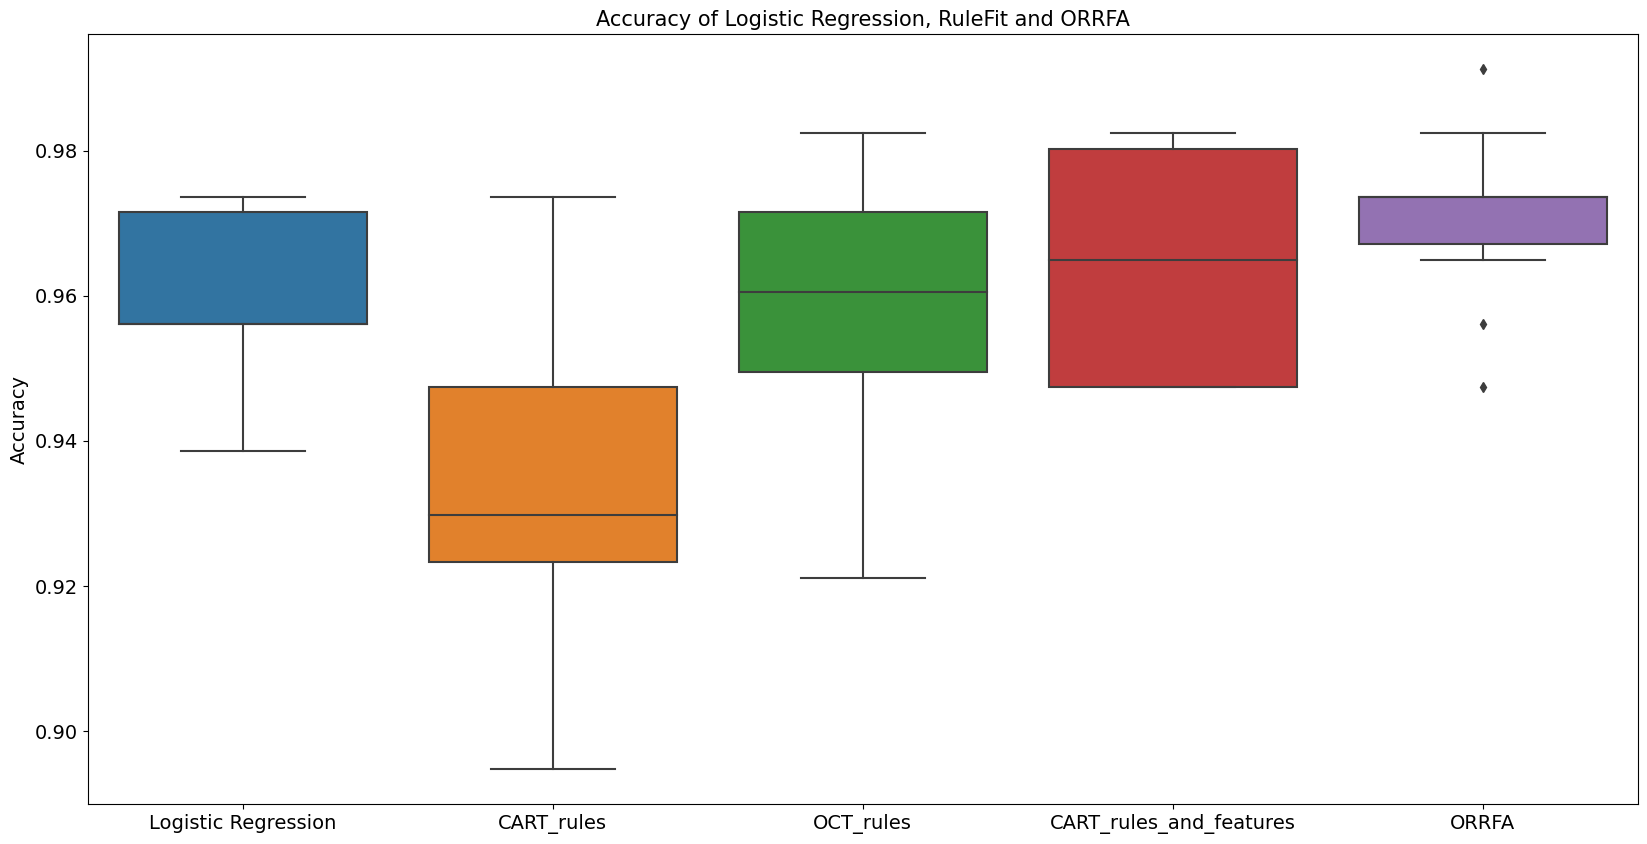

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
sns.boxplot(data = performance_by_iter)
fig.set_size_inches(20, 10)
ax.set_xticklabels(performance_by_iter.columns.values)
# ax.set_ylim(0.93, 0.995)
ax.tick_params(rotation = 0, labelsize = 14)
ax.set_ylabel("Accuracy", fontsize = 14)
ax.set_title("Accuracy of Logistic Regression, RuleFit and ORRFA", fontsize = 15)
# ax.set_ylabel()
plt.savefig('Benchmark ORRFA.png')

<Figure size 640x480 with 0 Axes>

In [8]:
performance_by_iter.mean()

Logistic Regression        0.973684
CART_rules                 0.929825
OCT_rules                  0.973684
OCTH_rules                 0.973684
CART_rules_and_features    0.959064
OCT_rules_and_features     0.973684
OCTH_rules_and_features    0.973684
ORT_rules                  0.929825
ORT_rules_and_features     0.961988
ORTH_rules                 0.921053
ORTH_rules_and_features    0.961988
dtype: float64